In [41]:
#Assignment No: 3
#Title: To Implement Image classification model using CNN Deep Learning Architecture
#Dataset: fashion_mnist
#Name: Esha Vijay Yadav
#RollNo: 4050

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


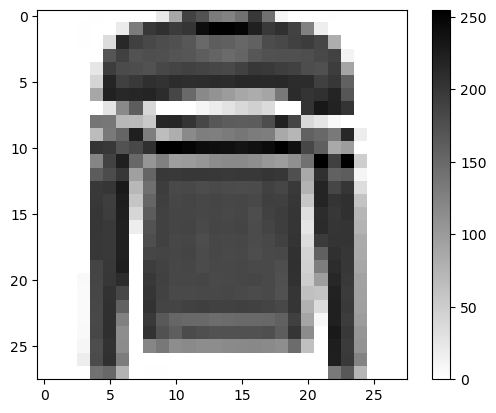

In [8]:
plt.figure()
plt.imshow(train_images[5],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

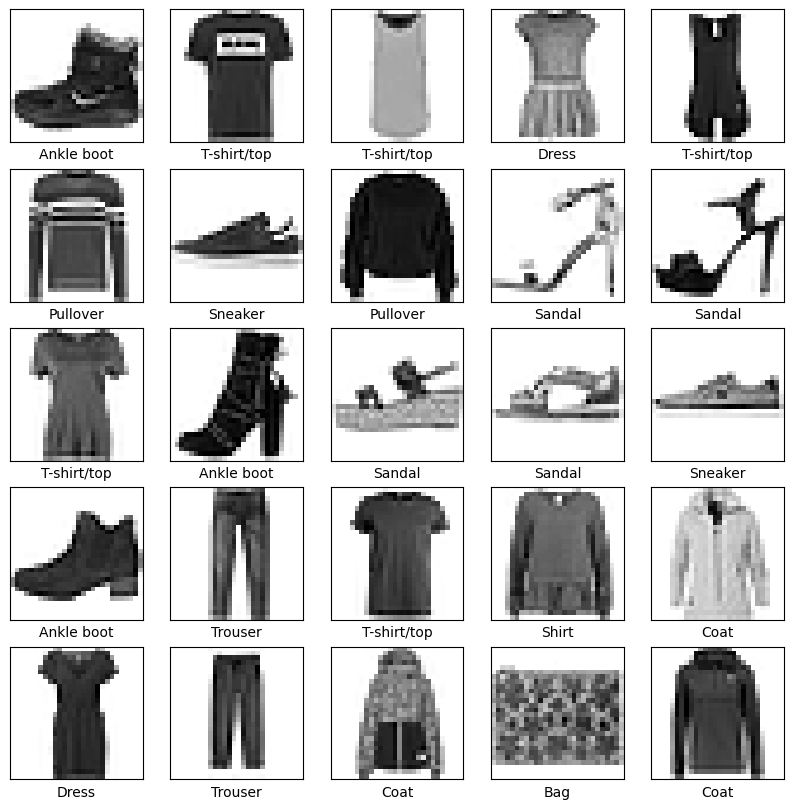

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
print("train_images: ", train_images.shape)
print("test_images: ", test_images.shape)

train_images:  (60000, 28, 28)
test_images:  (10000, 28, 28)


In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\yadav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model_history = model.fit(train_images, train_labels, batch_size=50, epochs=10, steps_per_epoch=840,validation_data=(test_images, test_labels))

Epoch 1/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 116s 132ms/step - accuracy: 0.7107 - loss: 0.8085 - val_accuracy: 0.8691 - val_loss: 0.3588
Epoch 2/10
360/840 ━━━━━━━━━━━━━━━━━━━━ 54s 113ms/step - accuracy: 0.8641 - loss: 0.3885

C:\Users\yadav\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


840/840 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.8654 - loss: 0.3773 - val_accuracy: 0.8821 - val_loss: 0.3264
Epoch 3/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 147s 124ms/step - accuracy: 0.8775 - loss: 0.3376 - val_accuracy: 0.8980 - val_loss: 0.2839
Epoch 4/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.8943 - loss: 0.2879 - val_accuracy: 0.8997 - val_loss: 0.2792
Epoch 5/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 102s 122ms/step - accuracy: 0.9073 - loss: 0.2615 - val_accuracy: 0.9091 - val_loss: 0.2546
Epoch 6/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 49s 58ms/step - accuracy: 0.9047 - loss: 0.2595 - val_accuracy: 0.9058 - val_loss: 0.2526
Epoch 7/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 155s 124ms/step - accuracy: 0.9153 - loss: 0.2336 - val_accuracy: 0.9089 - val_loss: 0.2397
Epoch 8/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.9190 - loss: 0.2177 - val_accuracy: 0.9133 - val_loss: 0.2464
Epoch 9/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 143s 112ms/step - accuracy: 0.9248 - loss: 0.2095 - val

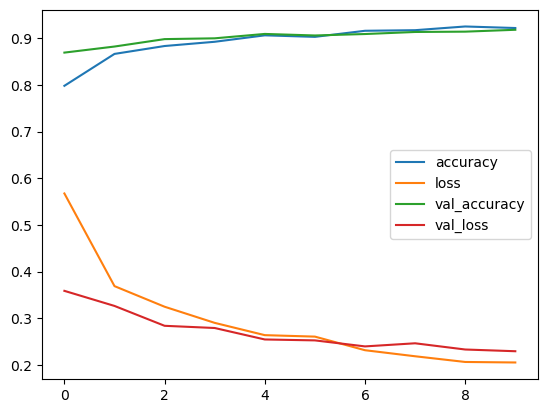

In [16]:
pd.DataFrame(model_history.history).plot()
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:' , test_acc)

313/313 - 7s - 24ms/step - accuracy: 0.9180 - loss: 0.2294

Test accuracy: 0.9179999828338623


In [19]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [21]:
def plot_img_label(img, pred_class, pred_percentage, true_class):
    plt.imshow(img,cmap=plt.cm.binary)
    if pred_class == true_class:
        color = 'blue'
    else:
        color='red'
    plt.title(label= f"Predicted: {pred_class} - {pred_percentage:2.1f}%\nActual: {true_class}",
              fontdict={'color': color})

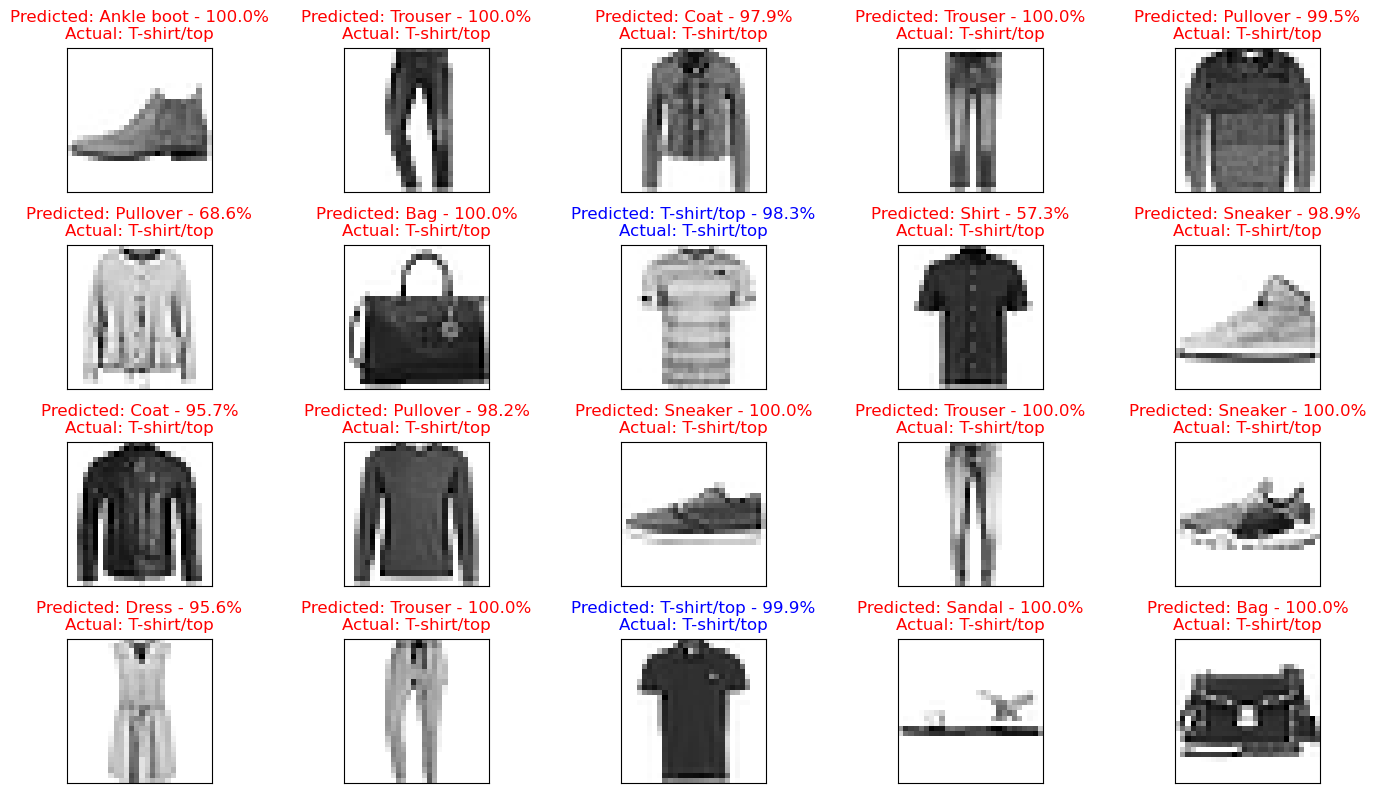

In [23]:
plt.figure(figsize=(14,10))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    i=i*5
    img = test_images[i].reshape(28,28)
    pred_class = class_names[np.argmax(predictions[i])]
    pred_percentage = np.max(predictions[i])*100
    true_class = class_names[np.argmax(test_labels[i])]
    
    plot_img_label(img, pred_class, pred_percentage, true_class)

plt.tight_layout()
plt.show()

In [32]:
predicted_label = np.argmax(predictions, axis=1) if predictions.ndim > 1 else predictions
true_label = np.argmax(test_labels, axis=1) if test_labels.ndim > 1 else test_labels

In [33]:
print(classification_report(true_label, predicted_label, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.85      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.84      0.86      1000
       Dress       0.89      0.94      0.92      1000
        Coat       0.83      0.90      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.77      0.75      0.76      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

